## Day 49 Lecture 2 Assignment

In this assignment, we will apply mean shift clustering to a dataset containing the results of a survey on financial wellbeing.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
well_df = pd.read_csv('NFWBS_PUF_2016_data.csv')
well_df

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,...,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,...,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,...,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,...,1,4,9,0,0,0,0,2,0,1.224941


While the survey questions have the potential for interesting cluster analysis, we will stick to the "score" columns to avoid clustering in an unreasonably high-dimensional space. The columns we are interested in all have "score" in their names; identify and isolate these columns. (There should be 4 in total.)

In [3]:
score_df = well_df.filter(like='score', axis=1)
score_df

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900
...,...,...,...,...
6389,61,47,3,1.267
6390,59,59,1,-1.215
6391,59,51,2,-1.215
6392,46,54,2,-1.215


Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [29]:
scale = StandardScaler()
scale.fit(score_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scale.mean_

array([56.03409446, 50.71911167,  2.50625586, -0.0569351 ])

In [31]:
scale.var_

array([200.32351695, 160.17258751,   0.57026115,   0.66401621])

In [32]:
scale_df = scale.transform(score_df)
scale_df

array([[-0.07306245, -0.53090616,  0.65383032,  1.62471561],
       [-0.35567668, -0.6099205 ,  0.65383032, -0.62962645],
       [-0.4969838 , -0.68893483,  0.65383032, -0.16084111],
       ...,
       [ 0.20955178,  0.02219421, -0.67039872, -1.42116191],
       [-0.70894447,  0.25923722, -0.67039872, -1.42116191],
       [-0.4969838 , -0.68893483, -0.67039872, -1.42116191]])

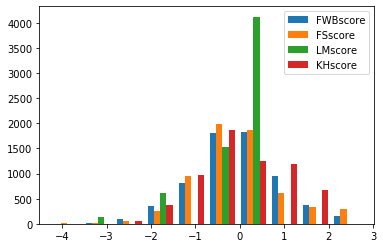

In [33]:
plt.hist(scale_df, label=score_df.columns)
plt.legend()
plt.show()

Run mean shift clustering on the scores in the survey dataset using the default bandwidth. Then answer the following by printing or typing as appropriate:

- How many clusters are produced? 
- What are the cluster centers?
- How many responses are assigned to each cluster?
- Are these results reasonable? If not, what changes should we make?

In [34]:
bw = estimate_bandwidth(scale_df)
bw

1.9962824784211841

In [35]:
clst = MeanShift().fit(scale_df)
clst

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [36]:
pd.Index(clst.labels_).value_counts()

0    6326
1      68
dtype: int64

In [37]:
clst.cluster_centers_

array([[ 0.09918758, -0.04722472,  0.40797515,  0.33667793],
       [-4.02966165, -4.08655136, -2.98779955, -2.17097301]])

Try changing the appropriate parameters of the mean shift algorithm to achieve a better clustering result. Answer all of the same questions from the previous clustering step.

In [38]:
bw = 1.5
clst = MeanShift(bw).fit(scale_df)

In [39]:
pd.Index(clst.labels_).value_counts()

0    4096
1    2156
5      50
4      24
2      23
7      22
6      12
3      11
dtype: int64

In [40]:
clst.cluster_centers_

array([[ 0.18717687, -0.01212255,  0.57954314,  0.53469707],
       [-0.31140956, -0.40488593, -0.94501915, -0.79586497],
       [-0.10838923, -3.46760571, -3.31885681, -2.33337073],
       [-4.02966165, -4.08655136, -2.98779955, -2.17097301],
       [ 0.9867409 , -3.1383793 , -0.0082842 , -1.89240162],
       [ 2.75307983,  2.70868169, -3.31885681, -2.4495444 ],
       [ 1.69327648, -3.21739364,  0.65383032,  0.94362696],
       [ 0.35085889, -3.37542232, -1.99462776, -1.75250233]])